In [3]:
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
files = glob.glob('../alignment/data/sequences/*/*/*.fa', recursive = True)
print(len(files))

1564


In [2]:
# There are 8 proteins with sequence length longer than 2048
# however encoder does not support truncating so I just set this to 3K sequence length.
seq_len = 3072
pretrained_model_generator, input_encoder = load_pretrained_model()
model = get_model_with_hidden_layers_as_outputs(pretrained_model_generator.create_model(seq_len))

# Read files
# There are 1564 protein sequences however only 1510 of them are unique.
files = glob.glob('../alignment/data/sequences/*/*/*.fa', recursive = True)
print(len(files))




1564


In [12]:
sequences = []
for file in files:
    with open(file, 'r') as f:
        lines = []
        for line in f:
            lines.append(line.strip())

    sequence = "".join(lines[1:])
    sequences.append(sequence)
    
seq_lens = [len(sequence) for sequence in sequences]

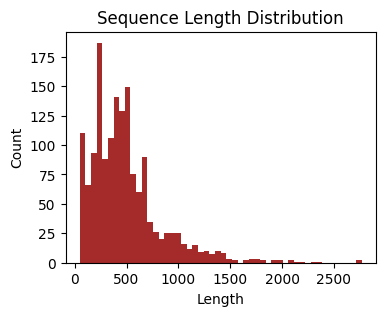

In [24]:
f, ax = plt.subplots(figsize = (4, 3))
ax.hist(seq_lens, bins = 50, color = 'brown')
ax.set_title('Sequence Length Distribution')
ax.set_xlabel('Length')
ax.set_ylabel('Count')
f.savefig('seq_len_distribution.png', dpi = 300, bbox_inches = 'tight')

In [17]:
pd.Series(seq_lens).describe()

count    1564.000000
mean      488.982737
std       343.716043
min        49.000000
25%       250.000000
50%       426.500000
75%       615.500000
max      2766.000000
dtype: float64